In [1]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from tensorflow.keras import callbacks


In [ ]:
x_train=pd.read_csv("x_train.csv")
x_valid=pd.read_csv("x_valid.csv")
y_train=pd.read_csv("y_train.csv")
y_valid=pd.read_csv("y_valid.csv")

In [1]:
# x_train.drop(x_train.iloc[:, 0:832], inplace = True, axis = 1)
# x_valid.drop(x_valid.iloc[:, 0:832], inplace = True, axis = 1)
# y_train.drop(y_train.iloc[:, 0:1], inplace = True, axis = 1)
# y_valid.drop(y_valid.iloc[:, 0:1], inplace = True, axis = 1)

In [13]:
opt = keras.optimizers.RMSprop(learning_rate=0.01)#Regularization , Rmsprop optimizer with leraning rate is 0.01

In [43]:
def build_model():
    model = Sequential()
    model.add(Dense(450, input_dim=900, kernel_initializer='normal', activation='relu'))
    # model.add(Dropout(0.2))# add dropout of 20%
    model.add(Dense(200, activation='relu'))
    # model.add(Dropout(0.1))# add dropout of 10%
    model.add(Dense(75, activation='relu'))
    model.add(Dropout(0.1))# add dropout of 10%
    # model.add(Dense(25, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])#compile our model
    return model

In [44]:
# Call
callbacks_list = [                                   
    callbacks.EarlyStopping(monitor='val_mae', 
                                    patience=20)]

# Build and fit model
model = build_model()                                                  
history = model.fit(x_train, y_train,         
                    validation_data=(x_valid, y_valid),
                    epochs=500, 
                    batch_size=128,
                    callbacks=callbacks_list,
                    verbose=0)

# Create list of all MAE values after each epoch
mae_history = history.history['val_mae']

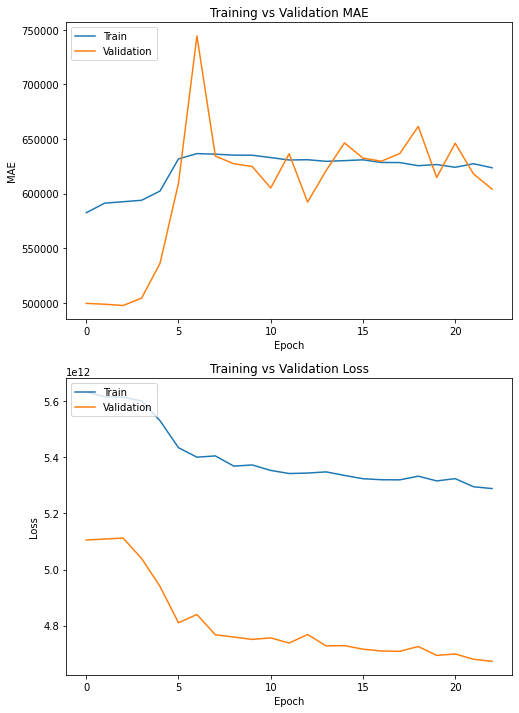

In [45]:
import matplotlib.pyplot as plt
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(history.history['mae'])

    plt.plot(history.history['val_mae'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

plot_hist(history.history, xsize=8, ysize=12)

In [46]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, nb_epoch=200, batch_size=64, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x_train, y_train, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))#find our mean squrae error


C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py", line 163, in fit
    history = self.model.fit(x, y, **fit_args)
  File "C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1183, in fit
    tmp_logs = self.train_functi

KeyboardInterrupt: 

In [35]:
regressor = KerasRegressor(build_fn=baseline_model,epochs=2,nb_epoch=100,batch_size=3)
regressor.fit(x_train,y_train) 

Epoch 1/2


ValueError: in user code:

    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\DangoNoChain\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_27 is incompatible with the layer: expected axis -1 of input shape to have value 68 but received input with shape (3, 900)


In [14]:
prediction = regressor.predict(x_valid)#predict model 
r2_score(y_valid, prediction)


0.061476411182955215